# Regressione lineare polinomiale

La regressione polinomiale è un caso particolare della regressione lineare multipla, in cui la variabile dipendente viene espressa tramite un polinomio di quella indipendente.

Così facendo potremmo riuscire a interpolare meglio i dati, in quanto aumentando il grado del polinomio oltre l'unità "induciamo" una curvatura che potrebbe rivelarsi preziosa per la predizione.

**N.B**: aumentare il grado del polinomio non vuol dire utilizzare un modello non lineare ! Il modello rimane **lineare** in quanto viene aumentata la potenza nelle variabili indipendenti (features) e non nei pesi !<br><br>
In pratica si tratta di generare un modello di **regressione lineare multipla** dove le features non sono solo quelle del dataset ma ne vengono aggiunte di nuove a partire dal prodotto delle stesse e dalla loro elevazione a potenza.

In questo notebook eseguiremo una regressione polinomiale sul Boston Housing Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Carichiamo il dataset.

In [2]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Regressione polinomiale con una feature
Cominciamo eseguendo una regressione polinomiale su di un unica proprietà.<br>
Nel notebook sulla regressione lineare multiplo avevamo visto che RM, LSTAT e PRATIO sono le proprietà maggiormente correlate con MEDV.

Visualizziamo la correlazione su delle coppie di grafici.

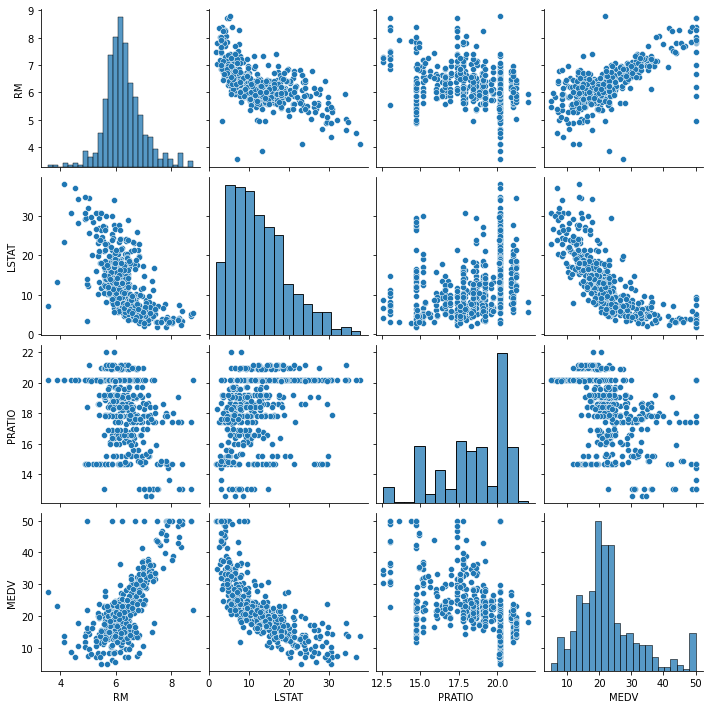

In [3]:
cols = ["RM","LSTAT","PRATIO","MEDV"]
sns.pairplot(boston[cols])

La correlazione tra LSTAT e MEDV è chiaramente non lineare, infatti osservando il secondo grafico della quarta riga si può vedere che le coppie di valori formano una curva.<br><br>
Bene, utilizziamo LSTAT per eseguire una regressione polinomiale, creiamo i nostri train set e test set.

In [4]:
X = boston[['LSTAT']]
Y = boston['MEDV']

In [5]:
Y.shape

(506,)

Per eseguire una regressione lineare polinomiale dobbiamo creare delle nuove proprietà polinomiali, con scikit-learn possiamo farlo utilizzando la classe **PolynomialFeatures**, il resto del processo è esattamente lo stesso.<br>


Eseguiamo 10 diverse regressioni polinomiali, dal grado 1 (regressione lineare semplice) al grado 10, dopodichè confrontiamo il loro MSE e R2 score.

In [6]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scores = []

for i in range(1,11):
    # generazione delle nuove proprietà polinomiali
    polyfeats = PolynomialFeatures(degree=i)
    X_poly = polyfeats.fit_transform(X)
    
    # generazione del train set e del test set
    X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly,Y, test_size=0.3, random_state=72018)
    
    # applicazione della regressione lineare (sulle nuove proprietà generate)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("Grado "+str(i)+": MSE="+str(mse)+" R2="+str(r2))
    print("Nuove features: ",polyfeats.get_feature_names(['LSTAT']))
    print('---------------------------------------------------------------------------------------------------------------')

Grado 1: MSE=42.994316885053316 R2=0.5399629874968648
Nuove features:  ['1', 'LSTAT']
---------------------------------------------------------------------------------------------------------------
Grado 2: MSE=35.16292235458851 R2=0.623758512220759
Nuove features:  ['1', 'LSTAT', 'LSTAT^2']
---------------------------------------------------------------------------------------------------------------
Grado 3: MSE=34.36135546655894 R2=0.6323352373139015
Nuove features:  ['1', 'LSTAT', 'LSTAT^2', 'LSTAT^3']
---------------------------------------------------------------------------------------------------------------
Grado 4: MSE=36.56240596479895 R2=0.608784108491783
Nuove features:  ['1', 'LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT^4']
---------------------------------------------------------------------------------------------------------------
Grado 5: MSE=32.69951362948149 R2=0.6501168607788299
Nuove features:  ['1', 'LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT^4', 'LSTAT^5']
------------------

Il nostro modello migliora fino al grado 5, poi comincia a oscillare e peggiorare. Il miglioramente del modello utilizzando una regressione polinomiale è evidente, prendendo come esempio l'R2 score, al grado 1 questo è di appena 0.5399 per arrivare fino ad 0.6501 al grado 5, utilizzando un'unica feature !

## Regressione polinomiale con tutte le features
Adesso ripetiamo l'intero processo, ma questa volta utilizzando tutte le features del dataset; ma prima andiamo a fare un po di **features engineering**

### Features Engineering

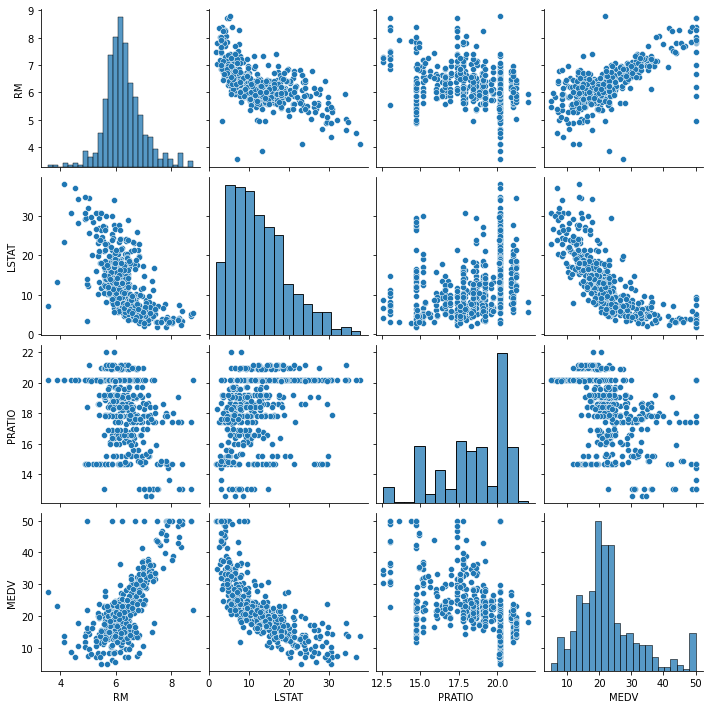

In [7]:
sns.pairplot(boston[cols])

Andando a vedere come le features sono correlate con la variabile target, possiamo notare che lo scatter plot LSTAT-MEDV ricorda molto l'andamento di un' **iperbole**; dunque possiamo pensare di eseguire la seguente trasformazione per generare una nuova feature.

In [8]:
boston.loc[:,'HYPER'] = 1/boston['LSTAT']

In [9]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,HYPER
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.200803
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.109409
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.248139
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.340136
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.187617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0.103413
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0.110132
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0.177305
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0.154321


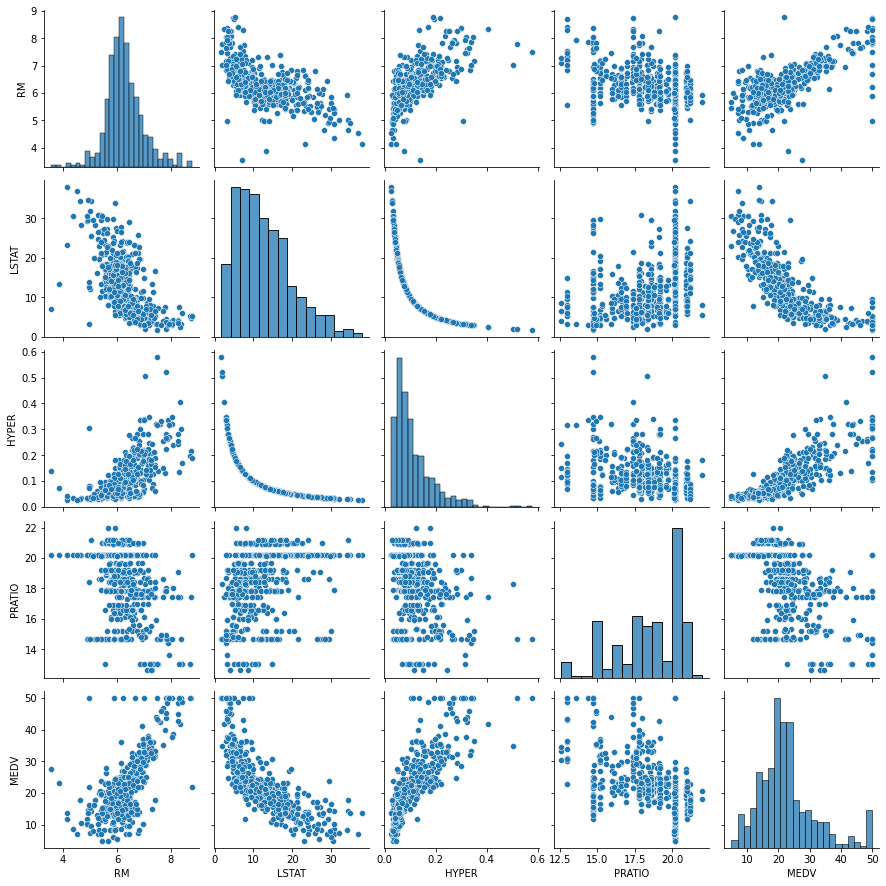

In [10]:
sns.pairplot(boston[["RM","LSTAT","HYPER","PRATIO","MEDV"]])

In [11]:
X = boston.drop('MEDV',axis=1)
Y = boston['MEDV']

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scores = []

for i in range(1,4):
    # generazione delle nuove proprietà polinomiali
    polyfeats = PolynomialFeatures(degree=i,include_bias=False)
    X = polyfeats.fit_transform(X)
    
    # generazione del train set e del test set
    X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=72018)
    
    # porto tutti i dati del dataset su una scala comune
    s = StandardScaler()
    X_train_poly = s.fit_transform(X_train_poly)
    X_test_poly = s.transform(X_test_poly)
    
    # applicazione della regressione lineare (sulle nuove proprietà generate)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))
    if i<3:
        #print(polyfeats.get_feature_names())
        print("Nuove features: ",polyfeats.get_feature_names(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'HYPER']))
    print('---------------------------------------------------------------------------------------------------------------')

DEGREE 1: MSE=22.539902989573783 R2=0.758824179922282
Nuove features:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'HYPER']
---------------------------------------------------------------------------------------------------------------
DEGREE 2: MSE=13.220776480138484 R2=0.8585383614500686
Nuove features:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'HYPER', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS', 'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS', 'CRIM RAD', 'CRIM TAX', 'CRIM PRATIO', 'CRIM B', 'CRIM LSTAT', 'CRIM HYPER', 'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE', 'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PRATIO', 'ZN B', 'ZN LSTAT', 'ZN HYPER', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PRATIO', 'INDUS B', 'INDUS LSTAT', 'INDUS HYPER', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE', 'CHAS DIS', 'CHAS RAD'

I risultati di una regressione polinomiale con tutte le features mi consentono di generare un modello (**R2 = 0.86** al grado 2) migliore di quello ottenuto utilizzando un solo predittore (R2=0.65 al grado 5).

Si può chiaramente notare che al crescere del grado il modello si complica troppo e le sue performance cominciano a decadere (in quanto diventa troppo complesso rispetto al fenomeno che si propone di descrivere).

Ovviamente un modello di regressione lineare polinomiale di grado 1 corrisponde proprio al **modello di regressione lineare multipla** (eccezion fatta per la nuova feature "HYPER" generata manualmente).

**NOTA BENE**

Una feature polinomiale non porta informazioni aggiuntive ma cambia il grafico della funzione, il che può permettere di catturare pattern più complessi, ma non hanno lo stesso peso in un modello di altre features informative.

